# Predicting Car Prices

The data set contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. The goal is to use machine learning to predict a car's market price using its attributes.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Exploring the Data

In [2]:
cars = pd.read_csv("imports-85.data")

In [3]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [4]:
cars.shape

(204, 26)

In [5]:
cars.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

### Cleaning the Data

Fixing column names according to the [documentation](https://archive.ics.uci.edu/ml/datasets/automobile)

In [6]:
cars.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [7]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [8]:
# Replacing '?' with NaN

cars = cars.replace("?", np.nan)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [9]:
# Dropping columns with non-numeric values


non_numeric = ["symboling", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "engine-type", "num-of-cylinders", "fuel-system", "engine-size"]
cars = cars.drop(non_numeric, axis=1)

In [10]:
# Convert to numerci

cars = cars.astype("float")

In [11]:
cars.isnull().sum()

normalized-losses    40
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [12]:
cars.shape

(204, 14)

In [13]:
cars.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [14]:
# Handling missong values

cars = cars.dropna(subset=['price'])
cars.isnull().sum()

normalized-losses    36
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [15]:
cars = cars.fillna(cars.mean())
cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
1,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
2,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
3,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
4,122.0,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0


### Applying k-nearest neighbors algorithm

In [17]:
# Normalizing the numeric columns

price = cars['price']
cars = (cars - cars.min())/(cars.max() - cars.min())
cars['price'] = price
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
1,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
2,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
3,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
4,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0


In [18]:
# Training and cross-validation

def knn_train_test(features, target, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    df_rnd = df.reindex(np.random.permutation(df.index))
    train = df_rnd.iloc[0:int(len(df_rnd) / 2)]
    test = df_rnd.iloc[int(len(df_rnd) / 2):]
    knn.fit(train[[features]], train[target])
    mse = mean_squared_error(test[target], knn.predict(test[[features]]))
    rmse = np.sqrt(mse)
    return rmse

In [19]:
features = cars.columns.drop('price')
rmse = {}
for feature in features:
    rmse[feature] = knn_train_test(feature, 'price', cars)

rmses = pd.Series(rmse)
rmses.sort_values()

curb-weight          3439.491639
highway-mpg          3737.162047
width                3773.135499
city-mpg             3813.193148
horsepower           4456.175620
length               5150.449177
wheel-base           5443.857347
bore                 6206.924562
peak-rpm             6458.378473
compression-rate     7193.588599
height               7380.628859
stroke               8184.186086
normalized-losses    8291.523386
dtype: float64

**Using the defult k value, "curb-weight" column had the minimum error and performed the best**

In [20]:
# Modifying the function so that it accept k as a parameter

def knn_train_test(features, target, df, k_list):
    np.random.seed(1)
    
    df_rnd = df.reindex(np.random.permutation(df.index))
    train = df_rnd.iloc[0:int(len(df_rnd) / 2)]
    test = df_rnd.iloc[int(len(df_rnd) / 2):]
    
    rmse_k = {}
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[[features]], train[target])
        mse = mean_squared_error(test[target], knn.predict(test[[features]]))
        rmse = np.sqrt(mse)
        rmse_k[k] = rmse
    return rmse_k

In [21]:
features = cars.columns.drop('price')
all_rmse_k = {}
for feature in features:
    all_rmse_k[feature] = knn_train_test(feature, 'price', cars, [1, 3, 5, 7, 9])
all_rmse_k

{'normalized-losses': {1: 7326.3413017685707,
  3: 6986.5527648953366,
  5: 8291.5233858200027,
  7: 7708.9522274497231,
  9: 7942.7827438607965},
 'wheel-base': {1: 4616.8556962504254,
  3: 5242.4142516168595,
  5: 5443.8573470288511,
  7: 5509.9977571942545,
  9: 5435.5298781986412},
 'length': {1: 6487.9187471792529,
  3: 6134.0858730358332,
  5: 5150.4491768776825,
  7: 4982.9670353830643,
  9: 4931.8879571970892},
 'width': {1: 5713.6163110590478,
  3: 4175.3698450955617,
  5: 3773.1354986006008,
  7: 3486.0353809367534,
  9: 3508.8770012640794},
 'height': {1: 10910.359147617461,
  3: 7805.3495931387406,
  5: 7380.6288593046047,
  7: 7272.5362031215964,
  9: 7121.2056591909932},
 'curb-weight': {1: 4390.8779224660757,
  3: 3668.3589437240184,
  5: 3439.4916393560256,
  7: 3174.0695108639184,
  9: 3373.692477825783},
 'bore': {1: 5926.5140107823927,
  3: 5927.9113517700689,
  5: 6206.9245622933095,
  7: 6239.1231894606235,
  9: 6407.8682834195579},
 'stroke': {1: 6674.979575249650

In [22]:
avg_rmse_per_feature = {}

for k, val in all_rmse_k.items():
    avg_rmse_per_feature[k] = np.mean(list(val.values()))
avg_rmse_all = pd.Series(avg_rmse_per_feature)
avg_rmse_all.sort_values()

curb-weight          3609.298099
city-mpg             3787.802725
highway-mpg          3788.622765
width                4131.406807
horsepower           4412.960576
wheel-base           5249.730986
length               5537.461758
bore                 6141.668280
compression-rate     7040.440142
peak-rpm             7112.435583
normalized-losses    7651.230485
stroke               7657.690117
height               8098.015892
dtype: float64

In [23]:
best_features = sorted(avg_rmse_per_feature , key=avg_rmse_per_feature .get)
best_features

['curb-weight',
 'city-mpg',
 'highway-mpg',
 'width',
 'horsepower',
 'wheel-base',
 'length',
 'bore',
 'compression-rate',
 'peak-rpm',
 'normalized-losses',
 'stroke',
 'height']

In [24]:
# Modifying the function to accept a list of column names

def knn_train_test(features, targets, df, k_list):
    np.random.seed(0)
    
    df_rnd = df.reindex(np.random.permutation(df.index))
    train = df_rnd.iloc[0:int(len(df_rnd) / 2)]
    test = df_rnd.iloc[int(len(df_rnd) / 2):]
    
    rmse_k = {}
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[features], train[[targets]])
        mse = mean_squared_error(test[[targets]], knn.predict(test[features]))
        rmse = np.sqrt(mse)
        rmse_k[k] = rmse
    return rmse_k

In [25]:
best_2 = best_features[0:2]
best_3 = best_features[0:3]
best_4 = best_features[0:4]
best_5 = best_features[0:5]

k = list(range(1,25))
features = [best_2, best_3, best_4, best_5]

k_rmse_features = {}

k_rmse_features["best_2_features"] = knn_train_test(best_2, 'price', cars, k)
k_rmse_features["best_3_features"] = knn_train_test(best_3, 'price', cars, k)
k_rmse_features["best_4_features"] = knn_train_test(best_4, 'price', cars, k)
k_rmse_features["best_5_features"] = knn_train_test(best_5, 'price', cars, k)

In [26]:
k_rmse_features

{'best_2_features': {1: 3641.8773702583671,
  2: 3342.447300257702,
  3: 3285.932545293987,
  4: 3069.9827412992081,
  5: 3513.3573295069209,
  6: 3907.9735449178488,
  7: 3979.692535913819,
  8: 4077.8235957776851,
  9: 4091.9407848888818,
  10: 4206.3519756553897,
  11: 4339.3506770136901,
  12: 4453.659577745525,
  13: 4471.9050626295275,
  14: 4554.3989016114965,
  15: 4612.675718303014,
  16: 4616.5682816842564,
  17: 4661.4371581161258,
  18: 4670.2652126690482,
  19: 4659.1140900140354,
  20: 4703.5520513198326,
  21: 4728.9068632859171,
  22: 4752.2778767721329,
  23: 4753.003269894677,
  24: 4736.4319661002764},
 'best_3_features': {1: 3040.9130010574127,
  2: 3127.5369438265634,
  3: 3378.0042569540969,
  4: 3327.4097482125644,
  5: 3642.474889028063,
  6: 3853.8897805766755,
  7: 4209.3559548574503,
  8: 4380.3327875323866,
  9: 4438.3576149876117,
  10: 4426.709299423218,
  11: 4340.0794527422768,
  12: 4362.1666488923065,
  13: 4414.882483046681,
  14: 4483.3014097724181,


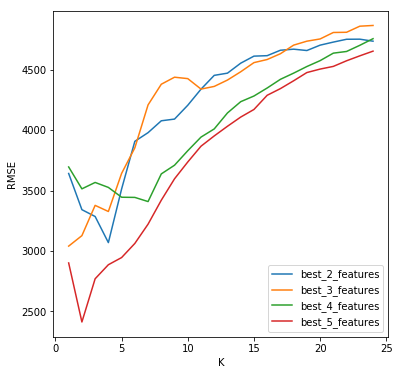

In [27]:
plt.figure(figsize=(6, 6))

for key, value in k_rmse_features.items():
    
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label = key)
    plt.xlabel("K")
    plt.ylabel("RMSE")
    
plt.legend()
plt.show()

**According to this chart, choosing the best 5 features along with the k value of 2 provides the best result.**